# รายวิชา: ข้อมูลขนาดใหญ่ (Big Data)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/witsarutsarai12-Academic/128-356-Big-Data/blob/main/BigData_Week1_Slides_in_Jupyter.ipynb)

 สัปดาห์ที่ 1: บทนำ + Python พื้นฐานสำหรับ Data Science


Notebook นี้ออกแบบให้ใช้สอนแบบ **สไลด์ใน Jupyter** (ข้อความอ่านได้ + โค้ดทดลอง) โดยแบ่งเป็นช่วงย่อย
- Part 0 เตรียมสภาพแวดล้อม
- Part 1 แนะนำผู้สอน
- Part 2 แนะนำรายวิชาและภาพรวมการประเมิน
- Part 3 Big Data คืออะไร
- Part 3.1 พัฒนาการทางประวัติศาสตร์ของ Big Data
- Part 4 ทำไม Python คือภาษาหลักของงานข้อมูล
- Part 5 Python พื้นฐาน (Hands-on)
- Part 6 Python สำหรับ Data Science
- Part 7 สรุปท้ายคาบ

___


## Part 0: การเตรียมสภาพแวดล้อม

การเตรียมสภาพแวดล้อม (Environment Setup) เป็นก้าวแรกที่สำคัญของนักข้อมูล การตรวจสอบเวอร์ชันของเครื่องมือช่วยลดปัญหาความเข้ากันได้ (Compatibility Issues) ที่อาจเกิดขึ้นเมื่อทำงานร่วมกับทีม หรือเมื่อนำโค้ดไปรันในเครื่องอื่น

**Checklist สั้น ๆ ก่อนเริ่ม**
- ใช้ `python --version` และ `pip list | head` ตรวจสอบว่าเวอร์ชันตรงกับที่ระบุในคอร์ส (>= 3.9)
- หากใช้ Colab ให้รัน block ตรวจสอบไลบรารีก่อนทุกครั้ง เพราะ environment ถูกรีเซตทุก session
- ถ้าเครื่องส่วนตัวติดตั้งแพ็กเกจไม่ได้ แนะนำสร้าง virtual environment (venv/conda) เพื่อแยก dependency ของวิชานี้ออกจากโปรเจ็กต์อื่น

In [1]:
# ตรวจสอบเวอร์ชัน Python
import sys
sys.version

'3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]'

In [2]:
# ตรวจสอบไลบรารีหลัก
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

(np.__version__, pd.__version__)

('2.0.2', '2.2.2')

## Part 1: แนะนำผู้สอน

### ผู้สอนรายวิชา
- ชื่อ–สกุล: วิศรุต สาหร่าย
- บทบาทและประสบการณ์:
  - Data Engineer / Data Scientist - US Startup
  - งานระบบข้อมูลขนาดใหญ่ (Data Pipeline / Cloud / Spark)
  - งานวิเคราะห์ข้อมูลเชิงธุรกิจและการนำเสนอผลลัพธ์

**เป้าหมายการเรียนรู้ร่วมกัน**
- สร้างความเข้าใจเชิงโครงสร้าง ไม่ใช่แค่การใช้เครื่องมือ
- ฝึกทำงานข้อมูลแบบทำซ้ำได้ (reproducible) และอธิบายได้ (explainable)


## Part 2: แนะนำรายวิชาและ Syllabus

### รายวิชานี้เรียนอะไรบ้าง
ในรายวิชานี้ เราจะเน้นสร้างความเข้าใจพื้นฐานที่แข็งแรง เพื่อให้นักศึกษาสามารถต่อยอดไปยังเครื่องมือระดับสูงได้
- Big Data คืออะไร (ในโลกจริง) และทำไมเราถึงต้องสนใจ
- Data Pipeline: ingest → clean → transform → analyze (หัวใจของการทำงานข้อมูล)
- เครื่องมือที่ใช้จริงในอุตสาหกรรม และแนวโน้มเทคโนโลยีล่าสุด

### รูปแบบการเรียน
- Lecture + Hands-on ใน Jupyter Notebook
- เน้นการคิดเชิงระบบและการทำงานกับข้อมูลขนาดใหญ่กว่าเครื่องมือทั่วไป

### การประเมิน (ตัวอย่างโครงสร้าง)
- Final Project (เลือกความยากได้): ทำ pipeline กับข้อมูลขนาดใหญ่และทำ dashboard
- สอบกลางภาค / ปลายภาค: เน้นความเข้าใจแนวคิดและการอธิบายเหตุผล


## Part 3: Big Data คืออะไร

> **วัตถุประสงค์ของช่วงนี้**: ให้นักศึกษาสามารถนิยาม Big Data ได้อย่างถูกต้องในเชิงระบบ แยกแยะจากคำศัพท์ที่เกี่ยวข้อง และเข้าใจ “เหตุผล” ที่ทำให้ต้องมีเครื่องมือ Big Data รวมถึงเห็นภาพว่าข้อมูลในโลกความเป็นจริงนั้นมีความซับซ้อนเพียงใด

### พื้นฐานก่อน Big Data: ข้อมูล (Data) vs สารสนเทศ (Information)
ก่อนจะไปถึง "Big" Data เรามาทำความเข้าใจรากศัพท์กันก่อน:

- **Data (ข้อมูล)**: มาจากภาษาลาตินคำว่า *datum* (เอกพจน์) แปลว่า "สิ่งที่ให้มา" (something given)
    - คือข้อเท็จจริงดิบ (Raw facts) ตัวเลข ตัวอักษร ที่ยังไม่ผ่านการประมวลผล
    - *Example*: 25, "Male", 170cm
    
- **Information (สารสนเทศ)**:
    - คือข้อมูลที่ผ่านการประมวลผล (Processed Data) เรียบเรียง หรือจัดกลุ่มแล้ว
    - มีบริบท (Context) และความหมาย (Meaning) ที่นำไปใช้ตัดสินใจได้
    - *Example*: "ค่าเฉลี่ยความสูงของนักเรียนชายในห้องคือ 170cm"

> **Wisdom Hierarchy (DIKW Pyramid)**:
> Data -> Information -> Knowledge -> Wisdom


---


**มุมมองจากผู้เชี่ยวชาญ (Definitions)**
- **Gartner (2001)**: "Big Data is high-volume, high-velocity and/or high-variety information assets that demand cost-effective, innovative forms of information processing."


***เน้นที่ 3Vs (Volume, Velocity, Variety) เป็นนิยามคลาสสิก***


- **Oracle**: "Big Data is the derivation of value from traditional relational database driven business decision making, augmented with new sources of unstructured data."


***เน้นที่ "Value" - ข้อมูลจะมีค่าก็ต่อเมื่อนำมาใช้ประโยชน์ได้***


- **Wikipedia**: "Big Data consists of extensive datasets primarily in the characteristics of volume, variety, speed, and/or variability that require a scalable architecture for efficient storage, manipulation, and analysis." (เน้น Architecture)


***เน้นที่ "ความซับซ้อน" จนซอฟต์แวร์ประมวลผลข้อมูลแบบเดิม (Standard Data Processing Software) รับมือไม่ได้***


> ### **สรุป** Big Data คือข้อมูลหลากหลายมหาศาลที่ไหลเร็วและซับซ้อนจนเกินเครื่องมือเดิม ต้องพึ่งสถาปัตยกรรม/เทคโนโลยีใหม่ที่ขยายได้ และจะมีคุณค่าก็ต่อเมื่อถูกแปลงเป็นมูลค่าทางธุรกิจ.

---

### ปัญหาข้อมูลในโลกจริง (Reality of Data)

ในโลกจริง ข้อมูลไม่ได้ถูกสร้างเพื่อการวิเคราะห์ แต่เกิดจากกิจกรรมและระบบงาน เช่น การซื้อขาย การใช้งานแอป การสื่อสาร และอุปกรณ์ IoT

**ลักษณะของข้อมูลจริง**
- เกิดขึ้นตลอดเวลา และเพิ่มขึ้นอย่างต่อเนื่อง (Continuous Growth)
- มีหลายรูปแบบ (Structured, Semi-structured, Unstructured) เช่น ตัวเลข ข้อความ ภาพ เสียง พิกัด
- มีความผิดพลาด ขาดหาย ซ้ำซ้อน และมี noise (Dirty Data) ซึ่งต้องอาศัยการทำความสะอาดก่อนนำไปใช้




![messy_vs_clean_data](https://github.com/witsarutsarai12-Academic/128-356-Big-Data/blob/main/images/messy_vs_clean_data_1768465020694.png?raw=1)

---

### นิยาม Big Data (Definition as a System Constraint)

Big Data คือชุดข้อมูลหรือภาระงาน (workload) ที่มี **ขนาด ความเร็ว ความหลากหลาย หรือความไม่แน่นอน** สูงจนทำให้การจัดการด้วยเครื่องมือดั้งเดิมไม่เพียงพอ

**ประเด็นสำคัญ**
- Big Data ไม่ได้หมายถึง “ไฟล์ใหญ่” อย่างเดียว
- Big Data คือ **ข้อจำกัดของระบบเดิม** เมื่อเจอข้อมูลจริง

> กล่าวอีกนัยหนึ่ง: Big Data คือ “ปัญหา” มากกว่า “เทคโนโลยี”



---

### ข้อจำกัดของเครื่องมือดั้งเดิม (Why Excel / Single DB Fail)

เครื่องมือดั้งเดิมมักทำงานบนเครื่องเดียว (single machine) จึงติดข้อจำกัดเชิงฟิสิกส์

**ข้อจำกัดที่พบได้จริง**
เมื่อปริมาณข้อมูลเกินขีดจำกัดของ Hardware เครื่องเดียว เราจะเจอปัญหา:
- หน่วยความจำ (RAM) ไม่พอ → เปิดไฟล์ไม่ได้ Program Crash หรือทำงานช้ามาก
- CPU ไม่พอ → การคำนวณที่ซับซ้อนใช้เวลานานเกินไป (เช่น เป็นวันหรือสัปดาห์)
- I/O (อ่าน/เขียน) เป็นคอขวด → การอ่านไฟล์ขนาดใหญ่กินเวลานาน
- การทำงานพร้อมกันหลายคน (Concurrency) ทำได้ยากและเสี่ยงต่อข้อมูลเสียหาย

**ตัวอย่างสถานการณ์**
- ไฟล์ CSV ขนาด 5–20GB: เปิดไม่ได้ในเครื่องทั่วไป
- การ Join ข้อมูลหลายตารางขนาดใหญ่: ใช้เวลานานมาก

---

### 5Vs ของ Big Data (มองให้เป็น “ปัญหา”)

การใช้ 5Vs ไม่ใช่เพื่อท่องจำ แต่เพื่อ “จำแนกชนิดของปัญหา”

- **Volume**: ปริมาณข้อมูลมหาศาล จนเกินขีดจำกัดการเก็บและประมวลผลของเครื่องเดียว
- **Velocity**: ความเร็วของข้อมูลที่เข้ามาอย่างต่อเนื่อง เช่น ข้อมูลจาก Sensor หรือ Social Media ที่ต้องการการประมวลผลแบบ Real-time
- **Variety**: ความหลากหลายของรูปแบบข้อมูล ทั้ง Structured (SQL), Semi-structured (JSON, XML), และ Unstructured (Image, Video, Text)
- **Veracity**: ความถูกต้องและความน่าเชื่อถือของข้อมูล ซึ่งข้อมูล Big Data มักมีความไม่แน่นอนสูง
- **Value**: คุณค่าที่ซ่อนอยู่ ข้อมูลจะมีประโยชน์ก็ต่อเมื่อเราสามารถสกัด Insight ออกมาตัดสินใจได้จริง

**ช่วงถาม–คิด**
- ปัญหาที่ทำให้ระบบล่มบ่อยที่สุดอยู่ใน V ใด และเพราะอะไร


![big_data_5vs](https://github.com/witsarutsarai12-Academic/128-356-Big-Data/blob/main/images/big_data_5vs_1768464556575.png?raw=1)

---

### Big Data vs Traditional Data (เปรียบเทียบเชิงสถาปัตยกรรม)

| มิติ | Traditional Data | Big Data |
|---|---|---|
| ขนาด | MB–GB | TB–PB หรือมากกว่า |
| การประมวลผล | Batch รายงานย้อนหลัง | Batch + Streaming + Interactive |
| สถาปัตยกรรม | Single-node | Distributed / Cluster |
| การขยาย | Vertical scaling | Horizontal scaling |
| รูปแบบข้อมูล | ส่วนใหญ่ Structured | Structured + Semi + Unstructured |

**สรุป**
Big Data ไม่ได้เปลี่ยน “เป้าหมาย” ของการวิเคราะห์ แต่เปลี่ยน “วิธี” ที่ต้องทำเพื่อให้ระบบรองรับได้

---

### ตัวอย่างเชิงกรณีศึกษา (E-commerce / Platform)

สมมติแพลตฟอร์มมี:
- ผู้ใช้งาน 500,000 คน/วัน
- Event log เฉลี่ย 50 events/คน/วัน → 25,000,000 events/วัน
- ข้อมูลคำสั่งซื้อ 200,000 รายการ/วัน
- ข้อมูลข้อความรีวิวและรูปภาพสินค้า

**คำถามที่องค์กรต้องตอบ**
- รายได้วันนี้เทียบกับสัปดาห์ก่อนเป็นอย่างไร
- สินค้าชนิดใดถูกคืนสูงผิดปกติ
- แคมเปญโฆษณาทำให้ conversion ดีขึ้นจริงหรือไม่

**ช่วงถาม–คิด**
- หากต้องได้คำตอบภายใน 5 นาที ระบบควรออกแบบแบบใด

---

### Big Data กับบทบาทในองค์กร (Why it matters)

Big Data สำคัญเพราะช่วยให้เกิดการตัดสินใจที่:
- เร็วขึ้น (timely)
- แม่นยำขึ้น (better evidence)
- รองรับสถานการณ์ซับซ้อน (complexity)

**ตัวอย่างผลลัพธ์ที่จับต้องได้**
- ลดต้นทุนการปฏิบัติการ (optimize logistics)
- เพิ่มรายได้ (recommendation / targeting)
- ลดความเสี่ยง (fraud detection)

---

### ทำไมต้องมี Data Pipeline (From Raw to Usable)

ข้อมูลดิบ (Raw data) ไม่สามารถใช้วิเคราะห์ได้ทันที ต้องผ่านกระบวนการ

**Pipeline ขั้นพื้นฐาน**
1) **Ingest**: นำเข้าข้อมูลจากแหล่งต่างๆ (Database, API, Logs)
2) **Clean**: ทำความสะอาดข้อมูล จัดการค่าที่หายไป (Null) หรือค่าที่ผิดปกติ (Outliers)
3) **Transform**: แปลงรูปแบบข้อมูลให้พร้อมใช้ เช่น เปลี่ยนรูปแบบวันที่, รวมตาราง
4) **Store**: จัดเก็บลงระบบที่เหมาะสม (Data Warehouse, Data Lake)
5) **Analyze**: วิเคราะห์หา Insight หรือนำไปสร้าง Model

**ตัวอย่างง่าย**
- CSV → แปลงเป็น Parquet → อ่านเร็วขึ้น → วิเคราะห์ได้ไวขึ้น


![data_pipeline_flow](https://github.com/witsarutsarai12-Academic/128-356-Big-Data/blob/main/images/data_pipeline_flow_1768464591379.png?raw=1)

---

### สรุปนิยามที่ถูกต้อง (Key Takeaways)

- Big Data คือ “ปัญหาเชิงระบบ” ที่เกิดจากข้อจำกัดของเครื่องมือดั้งเดิม
- เทคโนโลยี Big Data เกิดขึ้นเพื่อแก้ปัญหา 5Vs
- เป้าหมายของรายวิชาคือให้ทำ Pipeline ได้จริงและเข้าใจโครงสร้างระบบ

---

## Part 3.1: พัฒนาการทางประวัติศาสตร์ของ Big Data

> วัตถุประสงค์: เห็นวิวัฒนาการของ “การจัดการข้อมูล” ตั้งแต่ฐานข้อมูลในองค์กร → ERP/SAP → web-scale → NoSQL → Data Lake/Lakehouse

![evolution_timeline](https://github.com/witsarutsarai12-Academic/128-356-Big-Data/blob/main/images/evolution_timeline_1768464611899.png?raw=1)




### File-based Systems (ยุคข้อมูลกระจัดกระจาย)

- องค์กรจำนวนมากเริ่มจากการเก็บข้อมูลเป็นไฟล์ (CSV, Excel, Text)
- ข้อดี: เริ่มง่าย ต้นทุนต่ำ
- ข้อจำกัด: ซ้ำซ้อนสูง, เวอร์ชันไม่ตรงกัน, เชื่อมโยงข้อมูลยาก, ควบคุมคุณภาพยาก

---

![File-based System Visual](https://github.com/witsarutsarai12-Academic/128-356-Big-Data/blob/main/images/file_primary_storage.png?raw=1)


### ฐานข้อมูล (Database) เกิดขึ้นเพื่ออะไร

แนวคิดฐานข้อมูลเกิดขึ้นเพื่อแก้ปัญหาไฟล์กระจัดกระจาย โดยทำให้ข้อมูล
- มีศูนย์กลาง (Centralized) ทำให้บริหารจัดการง่าย
- มีมาตรฐานและตรวจสอบได้ (Data Integrity)
- รองรับผู้ใช้หลายคนพร้อมกัน (Concurrency Control)

องค์ประกอบสำคัญที่ทำให้ Database ต่างจากไฟล์:
- การกำหนดโครงสร้างข้อมูล (schema)
- ดัชนี (index) เพื่อค้นหาเร็ว
- การควบคุมสิทธิ์และการทำงานพร้อมกัน (concurrency)



---

### Relational Database (RDBMS) และ SQL

- จัดข้อมูลเป็นตาราง + ความสัมพันธ์ระหว่างตาราง
- ใช้ SQL ในการสืบค้นและสรุปข้อมูล
- จุดแข็ง: ความถูกต้อง (ACID), ความสัมพันธ์ชัดเจน, ใช้ได้ดีมากกับงานธุรกรรม (OLTP)

ข้อจำกัด:
- เมื่อข้อมูลโตมาก/ผู้ใช้มาก การขยายระบบมีต้นทุนสูง และมักติดปัญหา scale แบบเครื่องเดียว

---

![RDBMS Visual](https://github.com/witsarutsarai12-Academic/128-356-Big-Data/blob/main/images/popular_rdbms.png?raw=1)


### สิ่งที่ RDBMS ทำได้ดี และสิ่งที่เริ่มเป็นข้อจำกัด

**RDBMS ทำได้ดี**
- ข้อมูลธุรกรรม: การเงิน การสั่งซื้อ การลงทะเบียน
- ความถูกต้องและการบันทึกประวัติ

**ข้อจำกัดที่เริ่มชัดเมื่อข้อมูลโต**
- งานวิเคราะห์ที่ต้อง scan จำนวนมากทำให้ช้า
- ข้อมูลนอกตาราง (ข้อความ/ภาพ/log) เก็บและใช้งานยาก
- ขยายระบบแบบแนวนอนทำได้ยากกว่าแบบไฟล์/ระบบกระจาย

---



### ยุคข้อมูลธุรกิจ — ERP (Business Process Data)

ก่อนคำว่า Big Data จะเป็นที่นิยม องค์กรธุรกิจมี “ข้อมูลจำนวนมาก” อยู่แล้วจากระบบงานหลัก

- **ERP (Enterprise Resource Planning)** เก็บข้อมูลกระบวนการธุรกิจ เช่น บัญชี การเงิน จัดซื้อ คลังสินค้า การผลิต
- เป้าหมายหลัก: ทำให้ข้อมูล “ถูกต้อง” และ “เป็นมาตรฐานเดียว” เพื่อการควบคุมภายในและการตัดสินใจ

ข้อจำกัด:
- ออกแบบเพื่อ “งานปฏิบัติการ” (OLTP) มากกว่างานวิเคราะห์เชิงลึก
- รายงานหนัก ๆ ทำให้ระบบช้าหรือกระทบงานธุรกรรม

---

![ERP Visual](https://github.com/witsarutsarai12-Academic/128-356-Big-Data/blob/main/images/erp_flow_diagram.png?raw=1)



### ERP → SAP และการทำมาตรฐานข้อมูลองค์กร

- การเติบโตของแพลตฟอร์ม ERP ระดับองค์กร เช่น **SAP** ทำให้ข้อมูลธุรกิจถูกทำให้เป็นมาตรฐาน
- องค์กรเริ่มมีข้อมูลที่เชื่อมโยงข้ามหน่วยงานได้มากขึ้น (end-to-end process)

ข้อจำกัดที่เริ่มชัด:
- ต้องการรายงานและการวิเคราะห์ที่หลากหลายมากขึ้น
- งานวิเคราะห์บน OLTP ทำให้เกิดปัญหาคอขวดด้านประสิทธิภาพ

---



### OLTP vs OLAP (แยกชนิดงาน)

- **OLTP (Online Transaction Processing)**: งานธุรกรรม เน้นเร็วและถูกต้อง (insert/update สูง) เช่น ระบบธนาคาร
- **OLAP (Online Analytical Processing)**: งานวิเคราะห์ เน้นการสรุป/รวม/เจาะลึก (scan/aggregate สูง) เช่น ออกรายงานประจำปี

บทเรียนสำคัญ:
- ระบบเดียวทำทั้ง OLTP และ OLAP พร้อมกันมักทำให้ประสิทธิภาพตกและบริหารยาก

---

![OLTP Visual](https://github.com/witsarutsarai12-Academic/128-356-Big-Data/blob/main/images/oltp_vs_olap_visual.png?raw=1)


### Data Warehouse และ ETL (1995–2005)

- แนวคิดสำคัญ: แยกพื้นที่วิเคราะห์ออกจากระบบธุรกรรม
- ใช้ **ETL** ดึงข้อมูลจากหลายระบบ → ทำความสะอาด/มาตรฐาน → โหลดเข้า Warehouse
- รองรับ BI และรายงานย้อนหลัง

ข้อจำกัด:
- ยืดหยุ่นต่ำ เปลี่ยน schema ยาก
- ไม่เหมาะกับข้อมูลนอกตาราง (ข้อความ/ภาพ/ล็อก)
- ความหน่วงในการได้ข้อมูล (latency) สูง

---

### การระเบิดของข้อมูลยุคเว็บ (Web-scale)

- Web/App ทำให้เกิดข้อมูลชนิดใหม่จำนวนมหาศาล เช่น clickstream, search log, ad impression
- ข้อมูลเกิดเร็วและมากกว่าที่ warehouse แบบเดิมรองรับได้

ผลที่ตามมา:
- ต้องการระบบที่เก็บได้ “มหาศาล” และประมวลผลได้ “แบบกระจาย”



**เกร็ดประวัติศาสตร์: Information Explosion (2000s)**
การเกิดขึ้นของ Search Engine (Google, Yahoo) และ Social Media (Facebook, Twitter) ทำให้โลกเปลี่ยนจากยุค "มนุษย์ป้อนข้อมูล" (Data Entry) เป็นยุค "มนุษย์ทิ้งร่องรอยดิจิทัล" (Digital Footprint)
- **Crawl & Index**: การเก็บข้อมูลเว็บทั่วโลกต้องใช้วิธีคิดใหม่ที่ไม่ใช่แค่ database
- **User Generated Content**: ข้อมูลไม่ได้มาจากองค์กรฝ่ายเดียวอีกต่อไป

---


### แนวคิด Distributed Systems (พื้นฐานสำคัญ)

- แบ่งข้อมูลและงานออกเป็นหลายเครื่อง (horizontal scaling)
- ได้ throughput สูงขึ้น
- ต้องออกแบบให้รองรับความล้มเหลวของเครื่อง (fault tolerance)



**เกร็ดความรู้: Site Reliability Engineering (SRE)**
ในระบบขนาดใหญ่ที่มีเครื่องเซิร์ฟเวอร์พันเครื่อง "ความล้มเหลวคือเรื่องปกติ" (Failure is normal).
แนวคิดของ Google SRE คือ:
- **"Hope is not a strategy"**: อย่าหวังว่า hardware จะไม่พัง
- ออกแบบ Software ให้ **resilient**: ถ้าเครื่องพัง 10% ระบบต้องทำงานต่อได้โดย user ไม่รู้ตัว (Redundancy & Failover)

---

![Site Reliability Engineering Visual](https://github.com/witsarutsarai12-Academic/128-356-Big-Data/blob/main/images/sre_concept_visual_1768551934440.png?raw=1)


### Google File System (GFS) — การเก็บข้อมูลแบบกระจาย

- แนวคิด file system แบบกระจายเพื่อเก็บข้อมูลปริมาณมากบนเครื่องราคาทั่วไป
- ออกแบบให้ “ล้มได้” แต่ระบบยังทำงานต่อได้



**เกร็ดความรู้: หลักการทำงานเบื้องหลัง**
- **Chunk Servers**: เครื่องคอมพิวเตอร์ธรรมดา (commodity hardware) จำนวนมากที่เก็บชิ้นส่วนไฟล์
- **Master Node**: เครื่องหลักที่คอยจดจำว่า "ชิ้นส่วนไหน" เก็บอยู่ที่ "เครื่องใด"
หากเครื่องใดพัง ระบบจะสำเนาข้อมูลจากเครื่องอื่นมาทดแทนทันที ทำให้ข้อมูลไม่หาย



**เกร็ดความรู้: เบื้องหลังความเสถียร (SRE Mindset)**
Google มองว่า "Hardware พังเป็นเรื่องปกติ" (Failure is normal)
- แทนที่จะซื้อ Server ราคาแพงที่ไม่พังง่าย (Supercomputer)
- Google ใช้ Commodity Hardware (ราคาถูก) จำนวนมาก แล้วจัดการความเสถียรด้วย Software
- **Colossus**: คือระบบไฟล์รุ่นลูกของ GFS ที่พัฒนาขึ้นมาเพื่อแก้ข้อจำกัดเรื่อง Real-time และรองรับไฟล์จำนวนมหาศาลได้ดียิ่งขึ้น (เช่น ใช้ใน YouTube, Drive)

---

![Google File System Visual](https://github.com/witsarutsarai12-Academic/128-356-Big-Data/blob/main/images/gfs_architecture_1768551770079.png?raw=1)


### MapReduce — การประมวลผลแบบแบ่งงาน

- Map: กระจายงานย่อยไปหลายเครื่อง
- Reduce: รวมผลลัพธ์กลับมาเป็นคำตอบ

ข้อดี:
- ประมวลผลข้อมูลใหญ่ได้ด้วย cluster

ข้อจำกัด:
- งานหลายขั้นตอนซับซ้อน
- ช้าเพราะต้องอ่าน/เขียนลง disk บ่อย


![mapreduce_concept](https://github.com/witsarutsarai12-Academic/128-356-Big-Data/blob/main/images/mapreduce_concept_1768464638482.png?raw=1)



**ขั้นตอนการทำงาน (Walk-through)**
1. **Input**: ข้อมูลขนาดใหญ่ถูกแบ่งเป็นส่วนย่อย
2. **Map**: กระจายงานไปให้ Worker หลายเครื่องประมวลผลขนานกัน (เช่น นับคำในแต่ละส่วน)
3. **Shuffle**: จัดกลุ่มผลลัพธ์ที่เหมือนกันมารวมกัน (เช่น รวมคำว่า "Apple" จากทุกเครื่อง)
4. **Reduce**: ผสานผลลัพธ์สุดท้าย (เช่น รวมจำนวน "Apple" ทั้งหมดได้ 500 คำ)
5. **Output**: เขียนผลลัพธ์ลง Disk



**รู้จักกับ Bigtable: ปู่ของ NoSQL**
- Google สร้าง **Bigtable** (2006) เพื่อเก็บข้อมูลที่มีโครงสร้างยืดหยุ่น เช่น ข้อมูลหน้าเว็บมหาศาลสำหรับ Google Search
- มันเป็นต้นแบบของฐานข้อมูล NoSQL แบบ Wide-column store (เช่น Apache HBase, Cassandra)
- จุดเด่นคือการอ่าน/เขียนได้เร็วมาก และขยายตัวได้ง่าย

---



### Bigtable — แนวคิดฐานข้อมูลแบบกระจายระดับเว็บ

- รองรับข้อมูลขนาดใหญ่แบบ web-scale
- เน้นการ scale ในแนวนอนและ throughput
- สะท้อนแนวคิดว่า “ฐานข้อมูลสำหรับยุคเว็บ” ต้องต่างจาก RDBMS แบบเดิม



**Bigtable vs RDBMS**
- Bigtable ไม่รองรับ SQL เต็มรูปแบบ (ในยุคแรก) และไม่มี Join ที่ซับซ้อน
- ออกแบบมาให้ "Denormalize" ข้อมูล (เก็บซ้ำได้) เพื่อให้อ่านประมวลผลได้เร็วที่สุด



**Bigtable (The Base of Modern NoSQL)**
เป็นต้นแบบของ HBase และ Cassandra
- **Wide-column store**: เก็บข้อมูลเหมือนตารางยักษ์ที่มีเป็นล้าน column ได้
- **Sparse data**: ช่องไหนไม่มีค่า ก็ไม่กินที่เก็บจริง (ต่างจาก RDBMS ที่ NULL ก็อาจกินที่)
เหมาะสำหรับเก็บ Web Index หรือ User History ขนาดใหญ่

---




### Colossus — พัฒนาการของระบบจัดเก็บเมื่อข้อมูลโตขึ้น

- เมื่อปริมาณและชนิดงานโตขึ้น ระบบจัดเก็บต้องพัฒนาให้จัดการ metadata และการใช้งานหลากหลายได้ดีขึ้น
- สะท้อนบทเรียนว่า เมื่อข้อมูลโตเป็นหลายลำดับขนาด (order of magnitude) สถาปัตยกรรม storage ต้องเปลี่ยนตาม



**ทำไมต้อง Colossus?**
- GFS ยุคแรกมีปัญหาคอขวดที่ Master Node เมื่อไฟล์เยอะเกินไป (Metadata เยอะ)
- Colossus กระจายการจัดการ Metadata ทำให้รองรับไฟล์ระดับ Exabyte ได้จริง และรองรับ Real-time Application



**Colossus (Next-Gen GFS)**
เมื่อ GFS ถูกใช้งานหนักจนถึงขีดจำกัด Google จึงสร้าง Colossus ที่:
- จัดการ Metadata ได้เก่งขึ้น (Scale ได้ระดับ Exabyte)
- รองรับ Real-time ได้ดีขึ้น (เพราะบริการเริ่มต้องการความไว)

---

### Hadoop Ecosystem (2005–2012)

- HDFS: แนวคิด storage แบบกระจาย
- MapReduce: batch processing บน cluster

บทบาททางประวัติศาสตร์:
- ทำให้แนวคิด Big Data เข้าถึงได้ในวงกว้างผ่าน open-source

ข้อจำกัด:
- Disk-based → latency สูง
- พัฒนาและดูแลซับซ้อน

---

![Hadoop Visual](https://github.com/witsarutsarai12-Academic/128-356-Big-Data/blob/main/images/hadoop_landscape_diagram_1768551956356.png?raw=1)


### NoSQL — เมื่อ RDBMS ไม่ตอบโจทย์ข้อมูลยุคใหม่

- Key-value / Document / Columnar
- จุดแข็ง: scale ง่าย รองรับข้อมูลหลากหลายรูปแบบ และ schema ยืดหยุ่น
- จุดอ่อน: คุณสมบัติด้านความสอดคล้องของข้อมูล (consistency) และการ query บางรูปแบบอาจต่างจาก RDBMS (ขึ้นกับระบบ)

**บทเรียนเชิงสถาปัตยกรรม**
- บางครั้งระบบต้อง “ยอมแลก” บางคุณสมบัติเพื่อแลกกับการ scale และความยืดหยุ่น



**เกร็ดความรู้: CAP Theorem**
ในระบบกระจาย เรามักต้องเลือกระหว่าง:
- **Consistency (C)**: ข้อมูลตรงกันทุกเครื่องทันที
- **Availability (A)**: ระบบตอบสนองเสมอแม้บางส่วนมีปัญหา
NoSQL ส่วนใหญ่มักเลือก A (ตอบสนองไว) และยอมลด C (ข้อมูลอาจจะ update ไม่พร้อมกันเสี้ยววินาที - Eventual Consistency)

---



![NoSQL Visual](https://github.com/witsarutsarai12-Academic/128-356-Big-Data/blob/main/images/nosql_types_quadrant_1768551979683.png?raw=1)


### Apache Spark (2012+)

- In-memory processing ช่วยลดเวลาประมวลผลอย่างมีนัยสำคัญ (เร็วกว่า Hadoop MapReduce ถึง 100 เท่าในบาง tasks)
- API ระดับสูง (DataFrame, SQL) ทำให้พัฒนาได้เร็วและปลอดภัยขึ้น
- รองรับงานหลายแบบ: Batch, Streaming, Machine Learning, Graph Processing


![spark_in_memory_vs_disk](https://github.com/witsarutsarai12-Academic/128-356-Big-Data/blob/main/images/spark_in_memory_vs_disk_1768465074016.png?raw=1)

---

![Hadoop Visual](https://github.com/witsarutsarai12-Academic/128-356-Big-Data/blob/main/images/hadoop_ecosystem_landscape_1768466526224.png?raw=1)


### Cloud และแนวคิดแยก Storage กับ Compute

- Elasticity: เพิ่ม/ลดทรัพยากรได้ตามต้องการ
- Pay-as-you-go: จ่ายตามการใช้งานจริง
- แยกที่เก็บข้อมูล (object storage) ออกจากเครื่องประมวลผล (compute)

---

### Data Lake — เก็บข้อมูลดิบเพื่อความยืดหยุ่น

- เก็บข้อมูลดิบจำนวนมาก รองรับหลายรูปแบบ
- schema-on-read ทำให้ยืดหยุ่นต่อคำถามใหม่ ๆ

ข้อควรระวัง:
- หากไม่มี governance จะกลายเป็น data swamp


![datalake_vs_warehouse](https://github.com/witsarutsarai12-Academic/128-356-Big-Data/blob/main/images/datalake_vs_warehouse_1768464684861.png?raw=1)

---

### Lakehouse และสรุปวิวัฒนาการ

- Lakehouse รวมข้อดีของ Data Lake + Warehouse (เช่นความถูกต้องแบบ ACID บนไฟล์)
- แนวโน้มปัจจุบัน: analytics + ML + streaming บนข้อมูลชุดเดียวที่บริหารจัดการได้ดี

**ช่วงถาม–คิด (ปิดท้าย)**
- หากคุณเป็นองค์กรขนาดกลาง คุณควรเริ่มจากแนวคิดใดยุคใดก่อน และเพราะเหตุใด

---

## Part 4: ทำไม Python ถึงเป็นภาษาหลักของ Big Data

### เหตุผลสำคัญ
- **อ่านง่าย (Readability)**: โครงสร้างภาษาที่ใกล้เคียงภาษาอังกฤษ ทำให้เรียนรู้ได้เร็ว
- **Abstraction สูง**: ซ่อนความซับซ้อนของ memory management ทำให้โฟกัสที่ logic ได้
- **Performance ดี**: เมื่อใช้ร่วมกับไลบรารีอย่าง NumPy หรือ Pandas ที่เขียนด้วย C/C++
- **Ecosystem**: มีเครื่องมือครบวงจรสำหรับ Data Science (Pandas, Scikit-learn, TensorFlow)
- **Portability**: ใช้งานได้ข้ามแพลตฟอร์ม (Windows, Mac, Linux, Cloud)

**ตัวอย่างการนำไปใช้**
- เริ่มวิเคราะห์ด้วย Pandas/NumPy ใน notebook → ย้าย logic เดียวกันไปใช้ Spark DataFrame/SQL ได้แทบไม่ต้องเปลี่ยนภาษา
- ระบบ orchestration (Airflow/Prefect) และ workflow ML/Analytics ส่วนใหญ่รองรับ Python โดยตรง จึงเขียน pipeline ต่อเนื่องตั้งแต่ ingest → transform → model → dashboard ได้ในภาษาเดียว
- ชุมชนโอเพ่นซอร์สอัปเดตเร็ว เมื่อมีเครื่องมือใหม่ในสายข้อมูล (เช่น DuckDB, Polars, PySpark API ใหม่) มักมี binding ภาษา Python ให้ลองได้เร็วที่สุด

![python_data_ecosystem](https://github.com/witsarutsarai12-Academic/128-356-Big-Data/blob/main/images/python_data_ecosystem_1768465097331.png?raw=1)

---

## Part 5: Python พื้นฐาน (Hands-on)

> **เหตุผลที่ต้องเรียนพื้นฐานให้เป็นระบบก่อน**
> งาน Big Data ในทางปฏิบัติไม่ได้เริ่มจากการกดปุ่มในเครื่องมือ แต่เริ่มจากการเขียน “กระบวนการ” ที่ทำซ้ำได้ เช่น การอ่านข้อมูล การทำความสะอาด การแปลงรูปแบบ และการวิเคราะห์

### ทำไมต้องมีพัฒนาการของแนวคิด (Concept Evolution) ใน Python
แนวคิดในภาษาโปรแกรมพัฒนามาจากความต้องการทำให้โค้ด:
1) **อ่านง่าย** (readability)
2) **ดูแลง่าย** (maintainability)
3) **ขยายได้** (scalability of code)
4) **ทำงานร่วมกันได้** (collaboration)

กล่าวโดยสรุป: เมื่อระบบโตขึ้น การเขียนโค้ดแบบ “คิดเป็นส่วน” (abstraction) และ “มีโครงสร้าง” จะสำคัญมากกว่าการจำคำสั่ง

### เชื่อมกับ Data Science Libraries
ในโลกข้อมูล Python ถูกใช้อย่างกว้างขวางเพราะมีไลบรารีที่แปลงงานยากให้เป็นคำสั่งระดับสูง เช่น
- **NumPy**: คำนวณเชิงตัวเลขและอาร์เรย์อย่างมีประสิทธิภาพ
- **Pandas**: จัดการข้อมูลเชิงตาราง (เหมือน spreadsheet แต่ทรงพลังและทำซ้ำได้)
- **Matplotlib**: สร้างกราฟเพื่อสื่อสารผลลัพธ์

> หลังจากพื้นฐานส่วนนี้ นักศึกษาจะพร้อมเข้าสู่การจัดการข้อมูลด้วย Pandas และขยายไปสู่เครื่องมือ Big Data ในสัปดาห์ถัดไป

### แนวทางการฝึกให้ได้ผล
- Run ทีละ cell แล้วลองแก้ค่าตัวแปร/เงื่อนไขดูผลลัพธ์ทันทีเพื่อเห็น feedback
- จดสิ่งที่เปลี่ยนแปลงเมื่อเพิ่มวงเล็บ/เรียงลำดับคำสั่ง (ช่วยเรื่อง debugging และการอ่านโค้ดคนอื่น)
- เก็บ snippet ที่ใช้บ่อยไว้ในไฟล์ย่อยหรือ gist เพื่อ reuse ตอนทำ project/assignment

---

### 5.1 Variable & Operation

**แนวคิด**
ตัวแปรคือชื่อที่ใช้อ้างอิงข้อมูลในหน่วยความจำ เพื่อใช้งานซ้ำได้อย่างเป็นระบบ ส่วน operation คือการคำนวณ/แปลงข้อมูล ซึ่งเป็นหัวใจของการสร้างตัวแปรใหม่และตัวชี้วัดในงานข้อมูลจริง

**เปรียบเทียบให้เห็นภาพ**
ตัวแปรเหมือน "กล่องแปะป้ายชื่อ"
- เราสร้างกล่องชื่อ `score` แล้วใส่ค่า `10` ลงไป
- เมื่อเราสั่ง `score = 20` คือการเทค่าเดิมทิ้งแล้วใส่ `20` ลงไปแทน
- หรือมองว่าป้ายชื่อ `score` ย้ายไปแปะที่ข้อมูลตัวใหม่ก็ได้ (ใน Python จะเป็นแบบนี้)

**เคล็ดลับเชิงปฏิบัติ**
- Python เป็น dynamically typed: ชื่อตัวแปรชี้ไปที่ object เดิม หากต้องการ copy list/dict ให้ใช้ `.copy()` หรือ slicing (`nums[:]`) ไม่เช่นนั้นการแก้ไขจะกระทบตัวแปรที่อ้างอิงร่วมกัน
- ตรวจสอบชนิดและแปลงประเภทด้วย `type(x)`, `int()`, `float()`, `str()` เพื่อให้คำนวณได้ถูกต้องหลังอ่านไฟล์
- ตั้งชื่อตัวแปรแบบ `snake_case` ที่สื่อความหมายต่อการวิเคราะห์ เช่น `total_sales`, `avg_latency_ms`

In [3]:
# ตัวอย่าง 1: การกำหนดตัวแปรและคำนวณพื้นฐาน
a = 10
b = 3

(a + b, a - b, a * b, a / b)


(13, 7, 30, 3.3333333333333335)

In [4]:
# ตัวอย่าง 2: Arithmetic operations (ครบชุด)
# +  บวก
# -  ลบ
# *  คูณ
# /  หาร (float)
# // หารปัดเศษลง
# %  หารเอาเศษ
# ** ยกกำลัง

a = 17
b = 5
{
    "a + b": a + b,
    "a - b": a - b,
    "a * b": a * b,
    "a / b": a / b,
    "a // b": a // b,
    "a % b": a % b,
    "a ** b": a ** b,
}


{'a + b': 22,
 'a - b': 12,
 'a * b': 85,
 'a / b': 3.4,
 'a // b': 3,
 'a % b': 2,
 'a ** b': 1419857}

In [ ]:
# พื้นที่สำหรับทดลองเขียนโค้ด




In [5]:
# ตัวอย่าง 3: Augmented assignment
x = 10
x += 3   # x = x + 3
x -= 1   # x = x - 1
x *= 2   # x = x * 2
x /= 4   # x = x / 4
x


6.0

In [6]:
# ตัวอย่าง 4: Comparison operations
a = 10
b = 3
{
    "a == b": a == b,
    "a != b": a != b,
    "a > b": a > b,
    "a >= b": a >= b,
    "a < b": a < b,
    "a <= b": a <= b,
}


{'a == b': False,
 'a != b': True,
 'a > b': True,
 'a >= b': True,
 'a < b': False,
 'a <= b': False}

In [7]:
# ตัวอย่าง 5: Logical operations
age = 19
is_student = True

eligible = (age >= 18) and is_student
eligible, (not eligible), (eligible or False)


(True, False, True)

### 5.2 Data Types

**แนวคิด**
ชนิดข้อมูลมีผลต่อการคำนวณและความหมายของข้อมูล เช่น การบวกเลขกับการต่อข้อความเป็นคนละความหมายกัน

**ชนิดข้อมูลพื้นฐานที่ใช้บ่อย**
- `int`, `float`: ตัวเลขสำหรับคำนวณทางคณิตศาสตร์และสถิติ
- `bool`: ค่า True/False; ค่า 0, `""`, `[]`, `{}` จะถูกมองเป็น False (truthiness) จึงใช้ตรวจค่าว่างได้เร็ว
- `str`: ข้อความ ใช้บ่อยเมื่อ ingest ข้อมูลจากไฟล์/ API ก่อนแปลงเป็นตัวเลข
- `list`, `tuple`, `set`, `dict`: โครงสร้างเก็บหลายค่า เป็นรากฐานของการจัดกลุ่มข้อมูลก่อนวิเคราะห์
- `None`: แทนค่าที่ไม่มี/ยังไม่กำหนด ใช้ตรวจสอบก่อนคำนวณเพื่อเลี่ยง error

ใช้ `type(x)` หรือ `isinstance(x, (int, float))` เพื่อตรวจสอบชนิด และใช้ฟังก์ชันแปลง (`int("10")`, `float("3.14")`) เมื่อ ingest ข้อมูลที่เป็นข้อความ

In [8]:
x = 10          # int
y = 3.14        # float
name = "Data"   # string
flag = True     # boolean

(type(x), type(y), type(name), type(flag))


(int, float, str, bool)

In [ ]:
# พื้นที่สำหรับทดลองเขียนโค้ด




**ช่วงถาม–คิด**
- หากอ่านข้อมูลจากไฟล์แล้วตัวเลขถูกตีความเป็น string จะกระทบการวิเคราะห์อย่างไร

---


### 5.3 Python Reserved Words (Keywords)

**แนวคิด**
คำสงวน (reserved words หรือ keywords) คือคำที่ Python จองไว้ใช้เป็นไวยากรณ์ของภาษา จึงไม่ควรนำไปตั้งเป็นชื่อตัวแปรหรือชื่อฟังก์ชัน

**ทิปสำหรับการเขียนโค้ดจริง**
- ดูรายการคำต้องห้ามได้ด้วย `import keyword; keyword.kwlist`
- หลีกเลี่ยงการตั้งชื่อทับ builtins ที่ไม่ใช่ keyword เช่น `list`, `dict`, `id` เพราะจะทำให้เรียกฟังก์ชันมาตรฐานไม่ได้หรืออ่านยากขึ้น (ใช้ `student_list` แทน `list`)
- หากจำเป็นต้องใช้ชื่อเดียวกับ keyword ในการสื่อความหมาย ให้เติม `_` ต่อท้าย เช่น `class_` เพื่อเลี่ยงการชนกับ syntax

In [9]:
import keyword
keyword.kwlist

['False',
 'None',
 'True',
 'and',
 'as',
 'assert',
 'async',
 'await',
 'break',
 'class',
 'continue',
 'def',
 'del',
 'elif',
 'else',
 'except',
 'finally',
 'for',
 'from',
 'global',
 'if',
 'import',
 'in',
 'is',
 'lambda',
 'nonlocal',
 'not',
 'or',
 'pass',
 'raise',
 'return',
 'try',
 'while',
 'with',
 'yield']

In [ ]:
# พื้นที่สำหรับทดลองเขียนโค้ด




**ตัวอย่างข้อควรระวัง**
- ไม่ควรตั้งชื่อตัวแปรเป็น `class`, `def`, `for`, `if`, `import`, `return` เป็นต้น

---


### 5.4 Data Structures

**แนวคิด**
โครงสร้างข้อมูลช่วยให้จัดเก็บและจัดการข้อมูลหลายค่าพร้อมกันได้อย่างเป็นระบบ ซึ่งเป็นพื้นฐานของการเตรียมข้อมูลก่อนวิเคราะห์

**เลือกใช้ให้เหมาะกับงาน**
- `list`: เก็บข้อมูลเรียงลำดับ มีค่าซ้ำได้ เหมาะกับลำดับเหตุการณ์หรือ batch processing เล็ก ๆ
- `tuple`: ข้อมูลที่ไม่ควรเปลี่ยน เช่น พิกัด (lat, long) หรือ config ที่ต้องตรึงค่า
- `set`: เก็บค่าไม่ซ้ำ เช็กสมาชิกได้เร็ว เหมาะกับการ deduplicate หรือหาจุดตัดของกลุ่มข้อมูล
- `dict`: mapping key → value ใช้ดึงข้อมูลตามรหัส/ชื่อเฉพาะ หรือเก็บข้อมูลรูปแบบ JSON
- โครงสร้างเหล่านี้สามารถผสมกับ loop หรือ comprehension เพื่อแปลงข้อมูลเป็นขั้นตอน ๆ ได้

#### List

**การใช้งานจริง**
- เหมาะกับข้อมูลที่มีลำดับและอาจมีค่าซ้ำ เช่น log events, รายการซื้อสินค้า
- คำสั่งพื้นฐานที่ใช้บ่อย: `append`, `pop`, `extend`, slicing (`numbers[1:3]`) และการหาความยาวด้วย `len(numbers)`
- List comprehension ช่วยกรอง/แปลงข้อมูลในบรรทัดเดียว เช่น `[x**2 for x in numbers if x % 2 == 0]`

**List vs Tuple (เกร็ดเพิ่มเติม)**
- **List `[]`**: เหมือน "กระดาษทด" ที่เราเขียนเพิ่ม ลบ แก้ไข ได้ตลอดเวลา (Mutable)
- **Tuple `()`**: เหมือน "แผ่นศิลาจารึก" ที่เขียนแล้วเปลี่ยนไม่ได้ (Immutable) เหมาะกับข้อมูลที่ต้องคงที่ เช่น พิกัด (lat, long) หรือค่า config

In [10]:
numbers = [1, 2, 3, 4]

numbers.append(5)                  # เพิ่มค่าที่ท้ายลิสต์
first_two = numbers[:2]            # ตัด slice เพื่อหยิบบางส่วน
numbers.remove(3)                  # ลบค่าแรกที่พบ
squared_even = [n**2 for n in numbers if n % 2 == 0]

{
    "numbers": numbers,
    "first_two": first_two,
    "squared_even": squared_even,
}

{'numbers': [1, 2, 4, 5], 'first_two': [1, 2], 'squared_even': [4, 16]}

#### Tuple

ใช้เก็บข้อมูลที่ไม่ควรแก้ไข เช่น พิกัด (lat, long), สี (r, g, b) หรือ config ที่ต้องตรึงค่า และยังถูกใช้เป็น key ของ dict ได้เพราะเป็น immutable

- เหมาะกับการ "จับคู่" ข้อมูลที่ต้องใช้ร่วมกันเสมอ เช่น `(ชื่อ, คะแนน)` หรือ `(ปี, ไตรมาส)`
- Tuple unpacking (`lat, lon = coords`) ช่วยให้อ่านค่าหลายตัวได้ในบรรทัดเดียว

In [11]:
coords = (13.75, 100.50)
lat, lon = coords  # tuple unpacking

student_info = ("Alice", 85)
name, score = student_info

{
    "coords": coords,
    "lat_lon": (lat, lon),
    "student": {"name": name, "score": score},
}

{'coords': (13.75, 100.5),
 'lat_lon': (13.75, 100.5),
 'student': {'name': 'Alice', 'score': 85}}

#### Set

Set คือกลุ่มข้อมูลที่ไม่มีลำดับและไม่เก็บค่าซ้ำ ใช้เช็กสมาชิกหรือทำ operation ทางเซตได้รวดเร็ว เหมาะกับงาน deduplicate, whitelist/blacklist, หรือหาจุดตัดของกลุ่มข้อมูล

- `in` สำหรับตรวจสอบสมาชิกทำงานเร็วมาก (O(1) โดยประมาณ)
- การดำเนินการที่ใช้บ่อย: union (`|`), intersection (`&`), difference (`-`)

In [12]:
tags = {"python", "data", "etl", "python"}  # ค่าซ้ำถูกตัดออกอัตโนมัติ
new_tags = {"cloud", "etl", "spark"}

results = {
    "unique_tags": tags,
    "intersection": tags & new_tags,
    "union": tags | new_tags,
    "difference": tags - new_tags,
    "contains_etl": "etl" in tags,
}
results

{'unique_tags': {'data', 'etl', 'python'},
 'intersection': {'etl'},
 'union': {'cloud', 'data', 'etl', 'python', 'spark'},
 'difference': {'data', 'python'},
 'contains_etl': True}

#### Dictionary

- จัดเก็บข้อมูลแบบ key → value เหมาะกับการค้นหาเร็ว ๆ ตามรหัสหรือตัวระบุ เช่น `student_id -> คะแนน`
- ใช้บ่อยกับข้อมูล JSON ที่ซ้อนกัน (nested dict) สามารถเข้าถึงค่าลึก ๆ ได้ด้วย `dict["key"]["subkey"]`
- ควรใช้ `.get()` เมื่อ key อาจหายไปเพื่อลดโอกาสเกิด KeyError และสามารถกำหนดค่าดีฟอลต์ได้
- key ต้องเป็นชนิดที่ hash ได้ (immutable) เช่น `str`, `int`, `tuple` ส่วน `list` ใช้เป็น key ไม่ได้

In [13]:
student = {"name": "Alice", "score": 85, "courses": ["DS101", "ML201"]}

student["score"] += 5                 # update ค่า
student.setdefault("major", "Data Science")  # ใส่ค่า default หากยังไม่มี key

{
    "score": student["score"],
    "first_course": student["courses"][0],
    "has_gpa": "gpa" in student,
    "summary": f"{student['name']} ({student['major']})",
}

{'score': 90,
 'first_course': 'DS101',
 'has_gpa': False,
 'summary': 'Alice (Data Science)'}

In [ ]:
# พื้นที่สำหรับทดลองเขียนโค้ด




---


### 5.5 Condition

**แนวคิด**
โครงสร้างเงื่อนไขใช้กำหนดเส้นทางการทำงานของโปรแกรมตามสถานการณ์ที่แตกต่างกัน เป็นพื้นฐานของตรรกะในงานข้อมูล (เช่น การคัดกรอง/จัดกลุ่ม)

**แนวทางใช้ใน pipeline**
- ใช้กรองแถวที่ผ่านเกณฑ์ เช่น เฉพาะลูกค้าที่ active หรือคำสั่งซื้อที่ยอดเกิน 1,000
- ใช้ guard clause ตรวจสอบ input/config ก่อนทำงานจริง (`if not data: return []`) เพื่อลด error downstream
- จำไว้ว่า `0`, ค่า `None`, ค่าว่าง (`[]`, `{}`, `""`) จะ evaluate เป็น False จึงใช้เช็ก missing/empty ได้อย่างรวดเร็ว

In [14]:
score = 72

if score >= 80:
    result = "A"
elif score >= 70:
    result = "B"
else:
    result = "C"

result


'B'

**ช่วงถาม–คิด**
- หากเพิ่มเกณฑ์คะแนนใหม่ ต้องปรับโค้ดส่วนใด
- ระบบให้เกรดขนาดใหญ่ควรใช้ if-else อย่างเดียวเพียงพอหรือไม่

---


### 5.6 Loop

**แนวคิด**
ลูปช่วยให้ทำงานซ้ำได้อัตโนมัติ เหมาะกับงานที่ต้องทำกับข้อมูลหลายรายการ เช่น การคำนวณค่าจากหลายแถว หรือการประมวลผลรายการข้อมูล

![loop_logic_flowchart](https://github.com/witsarutsarai12-Academic/128-356-Big-Data/blob/main/images/loop_logic_flowchart_1768465154736.png?raw=1)

**เลือกใช้ลูปแบบไหน**
- `for` เหมาะกับจำนวนรอบชัดเจน เช่น loop ผ่านรายการข้อมูล; `while` ใช้เมื่อรอเงื่อนไขบางอย่างเกิดขึ้น
- ใช้ `enumerate` เมื่อต้องการทั้ง index และค่า หรือ `break`/`continue` เพื่อควบคุมทิศทางการทำงาน
- ถ้าเป้าหมายคือสร้าง collection ใหม่จากข้อมูลเดิม ให้พิจารณา list/dict comprehension เพื่อให้โค้ดสั้นและอ่านง่าย

In [15]:
for i in range(5):
    print(i)

0
1
2
3
4


In [16]:
numbers = [1, 2, 3]
for n in numbers:
    print(n * 2)

2
4
6


In [ ]:
# พื้นที่สำหรับทดลองเขียนโค้ด




---


### 5.6.1 Function

**แนวคิด**
ฟังก์ชันช่วยย่อยโค้ดเป็นหน่วยย่อย ทำให้โค้ดอ่านง่าย ทดสอบง่าย และนำกลับมาใช้ซ้ำได้ ซึ่งสำคัญมากเมื่อโครงงานมีหลายขั้นตอน

**Best Practice**
- 1 ฟังก์ชัน ควรทำแค่ 1 หน้าที่
- ชื่อฟังก์ชันควรเป็น "คำกริยา" ที่สื่อความหมาย เช่น `calculate_tax()`, `clean_data()`
- หากฟังก์ชันยาวเกินไป ควรแตกเป็นฟังก์ชันย่อย

**เสริมจากประสบการณ์จริง**
- ใช้ default arguments เพื่อค่าเริ่มต้นที่สมเหตุสมผล แต่หลีกเลี่ยง default ที่เป็น mutable (`[]`, `{}`)
- ใส่ type hints และ docstring สั้น ๆ เพื่อให้ทีมอื่นเข้าใจ input/output ชัดเจน
- แยก logic หลักออกจาก I/O (อ่านไฟล์/เขียนไฟล์) เพื่อให้ทดสอบได้ง่ายและลดผลข้างเคียง

In [17]:
def average(x, y):
    return (x + y) / 2

average(10, 20)


15.0

In [ ]:
# พื้นที่สำหรับทดลองเขียนโค้ด




---


### 5.7 Class & Object

**แนวคิด**
เมื่อโปรแกรมมีความซับซ้อนมากขึ้น เราต้องจัดกลุ่ม “ข้อมูล” และ “พฤติกรรม” ให้อยู่ด้วยกันอย่างเป็นระบบ (Object-Oriented Programming)

- **Class** คือแม่แบบที่กำหนดว่าออบเจ็กต์ควรมีข้อมูล (attributes) และความสามารถ (methods) อะไร
- **Object (Instance)** คือสิ่งที่ถูกสร้างจาก class

เหตุผลที่ใช้ class/object:
- ทำให้โค้ดอ่านง่ายขึ้นเมื่อระบบใหญ่
- ลดความซ้ำซ้อน
- แยกความรับผิดชอบของแต่ละส่วน (encapsulation)

![class_vs_object_metaphor](https://github.com/witsarutsarai12-Academic/128-356-Big-Data/blob/main/images/class_vs_object_metaphor_1768465178507.png?raw=1)

**เคล็ดลับการออกแบบเบื้องต้น**
- กำหนด `__repr__` หรือ `__str__` เพื่อช่วย debug/แสดงผลสรุปข้อมูล
- หาก class เน้นเก็บข้อมูลเป็นหลัก พิจารณาใช้ `@dataclass` เพื่อลดโค้ด boilerplate
- แยก business rule ให้เป็น method ที่ชัดเจน (เช่น `apply_bonus()`, `is_pass()`) เพื่อ reuse ใน pipeline อื่น

In [18]:
# ตัวอย่าง 1: Class พื้นฐาน (Student)
class Student:
    def __init__(self, name, score):
        self.name = name
        self.score = score

    def grade(self):
        return "Pass" if self.score >= 60 else "Fail"

s1 = Student("Bob", 75)
s2 = Student("Alice", 55)

(s1.name, s1.score, s1.grade()), (s2.name, s2.score, s2.grade())


(('Bob', 75, 'Pass'), ('Alice', 55, 'Fail'))

In [19]:
# ตัวอย่าง 2: เพิ่มพฤติกรรมและการปรับปรุงข้อมูล (Update)
class Student:
    def __init__(self, name, score):
        self.name = name
        self.score = score

    def add_bonus(self, bonus):
        self.score += bonus

    def grade(self):
        return "Pass" if self.score >= 60 else "Fail"

    def summary(self):
        return f"{self.name}: score={self.score}, status={self.grade()}"

s = Student("Chris", 58)
s.summary()


'Chris: score=58, status=Fail'

In [20]:
s.add_bonus(5)
s.summary()

'Chris: score=63, status=Pass'

In [ ]:
# พื้นที่สำหรับทดลองเขียนโค้ด




**ช่วงถาม–คิด**
- หากระบบมีนักศึกษาหลายพันคน class/object ช่วยให้จัดการกฎและการคำนวณได้อย่างไร
- แนวคิดนี้เชื่อมกับการออกแบบ pipeline หรือ dataset object ได้อย่างไร

---


### 5.8 Import Module

**แนวคิด**
การนำเข้าโมดูลทำให้เราใช้ความสามารถที่มีอยู่แล้วในมาตรฐานของภาษาและไลบรารีภายนอก ลดการเขียนซ้ำและทำให้ทำงานบนมาตรฐานเดียวกัน

**แนวทางปฏิบัติ**
- ใช้ alias ที่เป็นมาตรฐานเพื่อให้อ่านง่าย เช่น `import numpy as np`, `import pandas as pd`
- จัดกลุ่ม import ไว้ตอนต้นไฟล์ โดยแยก standard library, third-party, และโมดูลภายในโปรเจ็กต์เพื่อให้สแกนง่าย
- เมื่อใช้ virtual environment ให้บันทึก dependency ด้วย `requirements.txt` หรือ `pip freeze > requirements.txt` เพื่อย้ายสภาพแวดล้อมได้สะดวก

---

In [21]:
import math
math.sqrt(16)

4.0

---


## Part 6: Python สำหรับ Data Science

### 6.1 NumPy

**แนวคิด**
NumPy เป็นไลบรารีพื้นฐานด้านการคำนวณเชิงตัวเลข (numerical computing) โดยออกแบบให้ทำงานกับข้อมูลแบบอาร์เรย์ (array) ได้รวดเร็ว และรองรับการคำนวณแบบเวกเตอร์ (vectorization) ซึ่งเป็นพื้นฐานของการประมวลผลข้อมูลจำนวนมาก

![numpy_vs_list](https://github.com/witsarutsarai12-Academic/128-356-Big-Data/blob/main/images/numpy_vs_list_1768464708033.png?raw=1)

**ฟีเจอร์เด็ด: Broadcasting**
NumPy ฉลาดพอที่จะคำนวณอาร์เรย์ที่มีขนาดต่างกันได้โดยไม่ต้องวนลูปเอง
เช่น เอา `[1, 2, 3]` คูณกับ `2` มันจะกระจายเลข 2 ไปคูณทุกตัวให้อัตโนมัติ (`[2, 4, 6]`)
ทำให้โค้ดสั้นและทำงานไวมาก

**กรณีใช้งานที่เจอบ่อย**
- คำนวณเมทริกซ์/สถิติ (standardization, normalization) ด้วย vectorization แทนการวนลูป Python ช้า ๆ
- ตรวจสอบ `arr.shape` และ `arr.dtype` ก่อนคำนวณเสมอเพื่อลด bug จากขนาด/ชนิดข้อมูลไม่ตรง
- ใช้ `astype`, `np.where`, `np.nanmean` เพื่อจัดการ type และ missing values ก่อนส่งต่อให้ Pandas หรือ Spark

---

In [ ]:
# พื้นที่สำหรับทดลองเขียนโค้ด




In [22]:
import numpy as np
arr = np.array([1, 2, 3, 4])
(arr.mean(), arr.sum(), arr.min(), arr.max())


(np.float64(2.5), np.int64(10), np.int64(1), np.int64(4))

In [23]:
# vectorization: เพิ่ม 10% ให้ทุกค่าในครั้งเดียว
x = np.array([10, 20, 30, 40])
x * 1.1


array([11., 22., 33., 44.])

In [24]:
# สร้างข้อมูลจำลอง (synthetic data) เพื่อทดลอง
np.random.seed(42)
values = np.random.normal(loc=70, scale=10, size=20)
values


array([74.96714153, 68.61735699, 76.47688538, 85.23029856, 67.65846625,
       67.65863043, 85.79212816, 77.67434729, 65.30525614, 75.42560044,
       65.36582307, 65.34270246, 72.41962272, 50.86719755, 52.75082167,
       64.37712471, 59.8716888 , 73.14247333, 60.91975924, 55.87696299])

---


### 6.2 Pandas

**แนวคิด**
Pandas ใช้จัดการข้อมูลเชิงตาราง (เหมือน spreadsheet แต่ทำซ้ำได้) เหมาะกับขั้นตอน ingest/clean/transform ใน pipeline ขนาดย่อม

![pandas_dataframe_structure](https://github.com/witsarutsarai12-Academic/128-356-Big-Data/blob/main/images/pandas_dataframe_structure_1768464733427.png?raw=1)

**โครงสร้างข้อมูล: Series vs DataFrame**
- **Series**: ข้อมูล 1 มิติ (เหมือนคอลัมน์เดียวใน Excel หรือ List ที่มี Index)
- **DataFrame**: ข้อมูล 2 มิติ (เหมือนตาราง Excel ทั้งแผ่น) ประกอบด้วยหลาย Series มารวมกัน

**แนวทางปฏิบัติที่ช่วยให้ทำงานเร็วขึ้น**
- ตั้ง dtype และ index ให้ถูกตั้งแต่แรก จะช่วยลดปัญหา memory และการเปรียบเทียบค่าที่ผิดพลาด
- ใช้ method chaining เช่น `df.assign(...).query(...).groupby(...)` เพื่อเขียน pipeline อ่านง่ายและทำซ้ำได้
- ถ้าข้อมูลใหญ่ ให้ใช้ `read_csv(..., chunksize=...)` หรือบันทึกเป็น Parquet/Feather เพื่ออ่านซ้ำได้ไวและกินพื้นที่น้อย
- ตรวจสุขภาพข้อมูลด้วย `df.info()` และ `df.describe()` ก่อนลงมือ transform เพื่อลด surprise ตอนคำนวณ

---

In [ ]:
# พื้นที่สำหรับทดลองเขียนโค้ด




In [25]:
import pandas as pd

data = {
    "city": ["Bangkok", "Chiang Mai", "Phuket", "Bangkok"],
    "population_m": [10.7, 1.2, 0.4, 10.7],
    "visitors_k": [120, 35, 50, 130],
}
df = pd.DataFrame(data)
df


,city,population_m,visitors_k
0,Bangkok,10.7,120
1,Chiang Mai,1.2,35
2,Phuket,0.4,50
3,Bangkok,10.7,130


In [26]:
# สร้างคอลัมน์ใหม่จากการคำนวณ
df["visitors_per_million"] = df["visitors_k"] / df["population_m"]
df


,city,population_m,visitors_k,visitors_per_million
0,Bangkok,10.7,120,11.214953
1,Chiang Mai,1.2,35,29.166667
2,Phuket,0.4,50,125.000000
3,Bangkok,10.7,130,12.149533


In [27]:
# สรุปข้อมูลด้วย groupby + agg
summary = df.groupby("city").agg(
    avg_visitors_k=("visitors_k", "mean"),
    rows=("city", "count"),
).reset_index()
summary


,city,avg_visitors_k,rows
0,Bangkok,125.0,2
1,Chiang Mai,35.0,1
2,Phuket,50.0,1


In [28]:
# ตัวอย่าง missing values และการทำความสะอาด
df2 = df.copy()
df2.loc[1, "visitors_k"] = None

df2.isna().sum()


,0
city,0
population_m,0
visitors_k,1
visitors_per_million,0


In [29]:
df2["visitors_k"] = df2["visitors_k"].fillna(df2["visitors_k"].mean())
df2


,city,population_m,visitors_k,visitors_per_million
0,Bangkok,10.7,120.0,11.214953
1,Chiang Mai,1.2,100.0,29.166667
2,Phuket,0.4,50.0,125.000000
3,Bangkok,10.7,130.0,12.149533


---


### 6.3 Matplotlib

**แนวคิด**
Visualization มีเป้าหมายเพื่อสื่อสารแนวโน้ม ความสัมพันธ์ และความผิดปกติของข้อมูล กราฟที่ดีช่วยให้ตรวจสอบและอธิบาย insight ได้ชัดเจน

![matplotlib_chart_types](https://github.com/witsarutsarai12-Academic/128-356-Big-Data/blob/main/images/matplotlib_chart_types_1768465212197.png?raw=1)

**เคล็ดลับการเลือกกราฟและจัดรูปแบบ**
- เริ่มจากคำถาม: เปรียบเทียบ → bar/column, แนวโน้มเวลา → line, การกระจายตัว → histogram/boxplot, ความสัมพันธ์ → scatter
- ตั้ง `plt.figure(figsize=(...))` และ `plt.tight_layout()` เมื่อต้องการจัดพื้นที่ป้ายกำกับและทำให้กราฟอ่านง่ายขึ้น
- ถ้าต้องการ style/interactive เพิ่มเติม สามารถต่อยอดด้วย Seaborn หรือ Plotly ได้โดยยังใช้โครงสร้างข้อมูล Pandas เดิม

---

In [ ]:
# พื้นที่สำหรับทดลองเขียนโค้ด




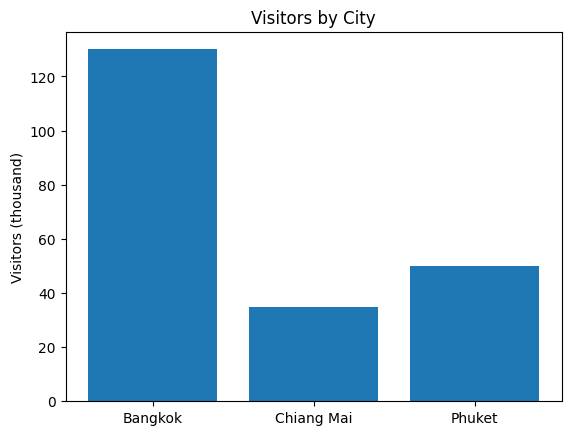

In [30]:
import matplotlib.pyplot as plt

plt.bar(df["city"], df["visitors_k"])
plt.title("Visitors by City")
plt.ylabel("Visitors (thousand)")
plt.show()


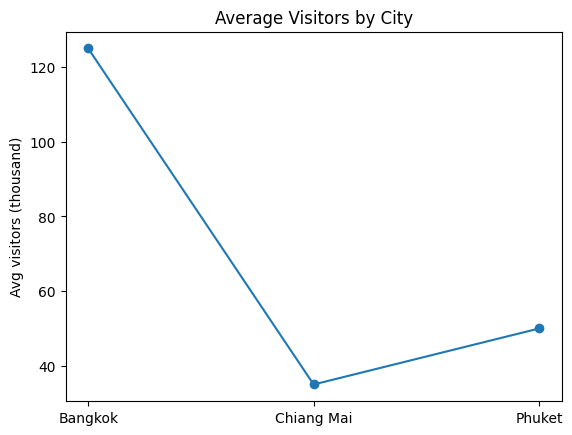

In [31]:
plt.plot(summary["city"], summary["avg_visitors_k"], marker="o")
plt.title("Average Visitors by City")
plt.ylabel("Avg visitors (thousand)")
plt.show()


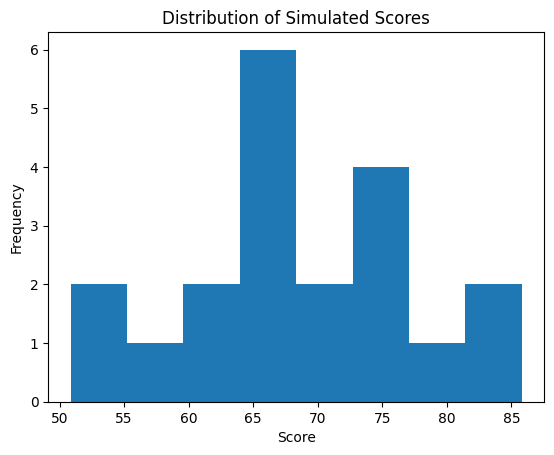

In [32]:
plt.hist(values, bins=8)
plt.title("Distribution of Simulated Scores")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()


---


## Part 7: สรุปท้ายคาบ

### สิ่งที่นักศึกษาควรได้วันนี้
- เข้าใจภาพรวม Big Data
- เห็นบทบาทของ Python
- เขียน Python พื้นฐานได้

### เตรียมตัวสัปดาห์หน้า
- อ่านเรื่อง CSV vs Parquet และลองแปลงไฟล์เล็ก ๆ เป็น Parquet เพื่อสังเกตขนาดไฟล์ที่ลดลง
- ฝึกเขียนฟังก์ชันสั้น ๆ สำหรับ clean ข้อมูล (เช่น ตัดช่องว่าง, แปลงประเภท) และทดลองกับ DataFrame ตัวอย่าง
- ติดตั้ง/ทดสอบสภาพแวดล้อมล่วงหน้า (Colab หรือ local venv) แล้วลองรันทุก cell ในส่วน Python พื้นฐานให้ครบ